In [2]:
#importing numpy
import numpy as np

# importing matplotlib to perform figures
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [3]:

list_temp=[]
list_PC=[]
list_PE=[]
counter=0
file = open('RMN_31P_fit_PE_CHOL_SM_5perc_DIM.csv', "r")

for line in file.readlines():

    if counter > 0:
        line_values = line.split()
        values = [float(x) for x in line_values]
        list_temp.append(int(values[0]))
        list_PE.append(values[1])        
    counter=counter+1


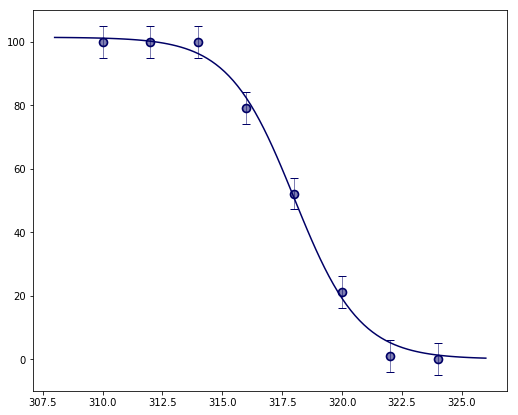

In [5]:
xdata = np.linspace(308, 326, 100)

def sigmoid(x, xo,k, A):
    y = A-A/(1+ np.exp(-k*(x-xo)))
    return y

p_start1=[308,0.3,120]

list_err=[5] * len(list_temp)


fig = plt.figure(figsize=(8.5, 7))
ax = fig.add_subplot(111)

yerr = 5.0

# values from Table S3
ax.plot(xdata, sigmoid(xdata, *[318,0.73,101.5]), "-", color='#000066')
ax.errorbar(list_temp, list_PE, yerr=yerr, linewidth=0.5, ls='none', capsize=4, color='#000066')
ax.plot(list_temp, list_PE,'o', markersize=8, mew='1.5', color='#000066', alpha=0.5)
ax.plot(list_temp, list_PE,'o', markersize=8, mfc='none', mew='1.5', color='#000066')

plt.ylim(-10,110)

fig.savefig("DIM0_fit_red_blue.svg", dpi=200)